# Descriptive Analysis

## Importing libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import date
import re

In [71]:
pd.set_option('display.max_columns', None)

## Loading data

In [32]:
ratings_df = pd.read_csv('Prepared Frames/rating_data.csv')
main_df = pd.read_csv('Prepared Frames/rated.csv')

In [33]:
main_df.columns

Index(['Ticker', 'Company Name', 'IndustryId', 'Fiscal Year', 'Fiscal Period',
       'Report Date', 'Shares (Diluted)',
       'Cash, Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Total Current Assets',
       'Property, Plant & Equipment, Net', 'Other Long Term Assets',
       'Total Noncurrent Assets', 'Total Assets', 'Payables & Accruals',
       'Total Current Liabilities', 'Total Noncurrent Liabilities',
       'Total Liabilities', 'Share Capital & Additional Paid-In Capital',
       'Retained Earnings', 'Total Equity', 'Revenue', 'Cost of Revenue',
       'Gross Profit', 'Operating Expenses',
       'Selling, General & Administrative', 'Operating Income (Loss)',
       'Non-Operating Income (Loss)', 'Interest Expense, Net',
       'Pretax Income (Loss), Adj.', 'Abnormal Gains (Losses)',
       'Pretax Income (Loss)', 'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations',
       'Net Extraordinary Gains (Losses

## Removing bad data
During the analysis I repeatedly came across implausible data or mismatched companies.
I will drop the problematic entries here at the beginning of the notebook, so that all consecutive analysis are also corrected.

In [88]:
# This company was mismatched
main_df = main_df[main_df['Ticker']!='RBBN']
# This row has implausible data, the interest expenses are 10 times higher than their whole assets
main_df = main_df.drop(main_df.index[1856])

## About the ratings

https://www.moodys.com/sites/products/productattachments/ap075378_1_1408_ki.pdf

We are looking at moodys long term credit ratings. They are structured in the following order from best to worst.

Investment grade:
Aaa
Aa
A
Baa

Non Investment Grade:
Ba
B
Caa
Ca
C

Default:
D

The appended number is an indicator weather a company ranges on the upper or lower end of their credit
rating.
Sice these create a lot of sub-categories we will remove the appended numbers and just look at the actual ratings.

In [76]:
# Removing numbers:
def rem_digits(rating):
    return re.sub('[0-9]','',rating)

main_df['Rating'] = main_df['Rating'].apply(rem_digits)

In [77]:
# Extra column for sorting
# Since sorting the rating alphabetically does not give us the right order. 
# I will create an extra column with a numerized version, that will help us visualize better.

rating_numbered = {'Aaa':11,'Aa':12,'A':13,'Baa':21,'Ba':22,'B':23,'Caa':31,'Ca':32,'C':33,'D':40}
main_df['Rating_numbered'] = main_df['Rating'].map(rating_numbered)

## Distribution of ratings

<AxesSubplot:xlabel='Rating', ylabel='count'>

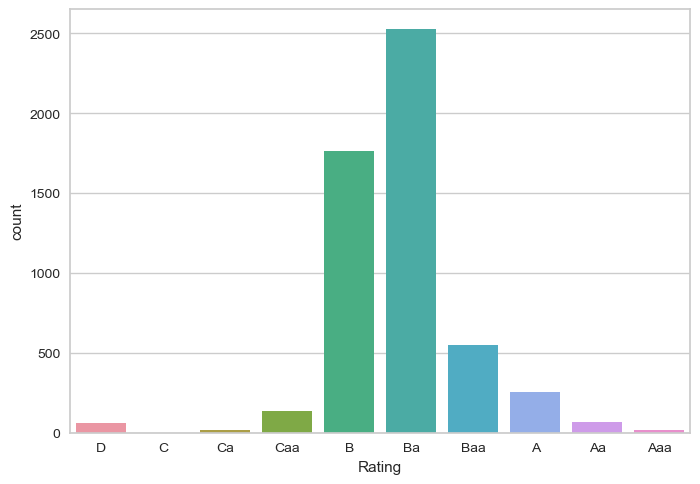

In [78]:
# We can see a big number of companies with B ratings and very few with A or C
sns.countplot(x='Rating', data=main_df.sort_values(by = ['Rating_numbered'], ascending = False))

We can see a lot of concentration on the middle field, with a low amount of companies in the A-grade range.
It looks, like the majority of companies are non investment grade. We will look at the numbers.

In [79]:
# Investment grade:
id_count = len(main_df[main_df['Rating_numbered']<22])
id_count
entries = len(main_df)

id_count/len(main_df) *100

# Only 19 percent of our dataframe are investment grade.

16.567828020756114

## Interest expenses
We calculate a columnm, that gives us an estimate of the average interst expense of a company in relation to their total debt load.

In [80]:
main_df.columns

Index(['Ticker', 'Company Name', 'IndustryId', 'Fiscal Year', 'Fiscal Period',
       'Report Date', 'Shares (Diluted)',
       'Cash, Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Total Current Assets',
       'Property, Plant & Equipment, Net', 'Other Long Term Assets',
       'Total Noncurrent Assets', 'Total Assets', 'Payables & Accruals',
       'Total Current Liabilities', 'Total Noncurrent Liabilities',
       'Total Liabilities', 'Share Capital & Additional Paid-In Capital',
       'Retained Earnings', 'Total Equity', 'Revenue', 'Cost of Revenue',
       'Gross Profit', 'Operating Expenses',
       'Selling, General & Administrative', 'Operating Income (Loss)',
       'Non-Operating Income (Loss)', 'Interest Expense, Net',
       'Pretax Income (Loss), Adj.', 'Abnormal Gains (Losses)',
       'Pretax Income (Loss)', 'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations',
       'Net Extraordinary Gains (Losses

In [81]:
main_df['interest_rate'] = main_df['Interest Expense, Net']/main_df['Total Liabilities']*100

In [82]:
main_df['interest_rate'].min()

-5.077309502490027

In [83]:
main_df['interest_rate'].max()

2439.7884996695307

In [89]:
main_df.sort_values(by = ['interest_rate'], ascending = False) 

,Ticker,Company Name,IndustryId,Fiscal Year,Fiscal Period,Report Date,Shares (Diluted),"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Total Current Assets,"Property, Plant & Equipment, Net",Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Total Current Liabilities,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Total Equity,Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common),Sector,Industry,difflib,Rating,Rating_numbered,interest_rate
1856,GTN,GRAY TELEVISION INC,103001.0,2018,Q4,2018-12-31,88682000.0,667000.0,1.840000e+05,8.730000e+05,3.630000e+05,2.977000e+06,3.340000e+06,4.213000e+06,9.600000e+04,1.500000e+05,2.876000e+06,3.026000e+06,9.340000e+05,3.720000e+05,1.187000e+06,-7.545700e+08,-2.056667e+05,3.303333e+05,85206000.0,29833000.0,-669364000.0,72202000.0,73828000.0,-597162000.0,0.0,-165501000.0,43121000.0,-122380000.0,0.0,-122380000.0,-122380000.0,Consumer Cyclical,Entertainment,"gray television, inc.",B,23,2439.788500
2708,EXEL,"EXELIXIS, INC.",106002.0,2019,Q3,2019-09-30,315566000.0,760667000.0,1.835890e+08,9.721120e+08,4.946700e+07,2.765230e+08,8.127530e+08,1.784865e+09,7.836800e+07,1.410690e+08,4.007900e+07,1.811480e+08,2.229143e+09,-6.280940e+08,1.603717e+09,2.717030e+08,-7.537000e+06,2.641660e+08,-148560000.0,-51265000.0,115606000.0,7051000.0,20253000.0,122657000.0,0.0,122657000.0,-25205000.0,97452000.0,0.0,97452000.0,97452000.0,Healthcare,Biotechnology,"exelis, inc.",Ba,22,11.180361
1956,EXEL,"EXELIXIS, INC.",106002.0,2018,Q4,2018-12-31,312818000.0,693334000.0,1.627710e+08,8.970160e+08,5.089700e+07,3.171860e+08,5.252700e+08,1.422286e+09,9.051800e+07,1.054720e+08,2.936100e+07,1.348330e+08,2.168517e+09,-8.803630e+08,1.287453e+09,2.286020e+08,-7.352000e+06,2.212500e+08,-109648000.0,-52377000.0,111602000.0,4770000.0,12841000.0,116372000.0,0.0,116372000.0,243717000.0,360089000.0,0.0,360089000.0,360089000.0,Healthcare,Biotechnology,"exelis, inc.",Ba,22,9.523633
1981,AAC_delist,"AAC Holdings, Inc.",106011.0,2018,Q4,2018-12-31,24243906.0,5409000.0,4.786000e+07,6.396400e+07,1.669210e+08,2.213920e+08,3.883130e+08,4.522770e+08,5.193000e+07,3.614450e+08,4.855900e+07,4.100040e+08,1.619870e+08,-9.757400e+07,4.227300e+07,5.744800e+07,-6.800700e+07,-1.055900e+07,-14203000.0,-5524000.0,-24762000.0,23518000.0,23340000.0,-1244000.0,0.0,-40174000.0,1729000.0,-38445000.0,0.0,-36677000.0,-36677000.0,Healthcare,Health Care Providers,"aac holdings, inc.",Caa,31,5.692627
4049,UNIT,Uniti Group Inc.,109001.0,2020,Q4,2020-12-31,231566000.0,141900000.0,4.413000e+08,7.956000e+08,3.577900e+09,5.047600e+09,8.625500e+09,9.421100e+09,2.312000e+08,1.035200e+09,6.874400e+09,7.909600e+09,1.800000e+06,4.720000e+07,1.511500e+09,4.696530e+08,-1.234845e+08,1.468985e+08,735064000.0,-101114000.0,389717000.0,388755000.0,331327000.0,778472000.0,0.0,744390000.0,-26050000.0,718340000.0,0.0,706532000.0,707391000.0,Real Estate,REITs,uniti group inc.,B,23,4.188922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,XOG_delist,"Extraction Oil & Gas, Inc.",107002.0,2018,Q1,2018-03-31,171910000.0,15363000.0,6.155200e+07,2.025110e+08,3.292315e+09,7.037300e+07,3.362688e+09,3.565199e+09,3.120020e+08,4.109720e+08,1.422678e+09,1.833650e+09,2.125770e+09,-5.496380e+08,1.731549e+09,2.302150e+08,-2.824200e+07,2.019730e+08,-154766000.0,-30969000.0,47207000.0,-62974000.0,-63302000.0,-15767000.0,0.0,-66095000.0,14100000.0,-51995000.0,0.0,-51995000.0,-56154000.0,Energy,Oil & Gas - E&P,"extraction oil and ga

<AxesSubplot:xlabel='interest_rate', ylabel='Count'>

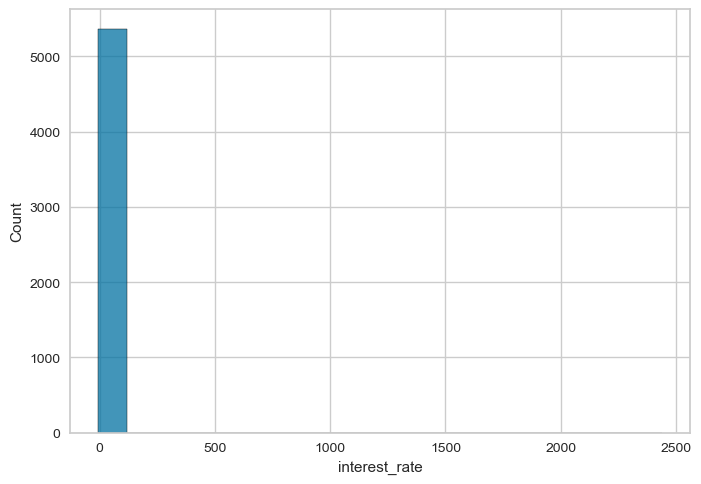

In [87]:
sns.histplot(data=main_df[main_df['interest_rate']!= 0]['interest_rate'], bins = 20)